# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Noortje Theuws| 2004364|
|Judith van der Burgt| 2004200|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [44]:
min_offer = 0.0
max_offer = 10.0
step = 0.1
offers = np.arange(min_offer,max_offer+step, 0.1)
print(offers)

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10. ]


<span style="color:blue">Here we've first defined the min and max offer and also the difference between each two offers  (also called step)
This is filled in in np.arange which will create an array of all offers. This function is called offers. In this function we have to add a step to the max offer to also get 10 included in the list. This is because the function uses an half-open interval. 
Finally we used print to actually see the list.<span style="color:blue">

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [36]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept
 
def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

<span style="color:blue">here the functions of the offers, returns and outside options are created. This is done the same way as we did in week 5. <span style="color:blue">

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [40]:
offer = {}


<span style="color:blue">here is given a dictionary of offers. This is done the same as we learned in week 5. <span style="color:blue">

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [2]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]=make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer


<span style="color:blue">Here a formula is created which will give you the outcome of the game. 
The only variables you need to fill in are the number of  periods and the discount factor.<span style="color:blue">


**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [42]:
delta = 0.9
print(outcome(1,0.9))
print(outcome(2,0.9))
print(outcome(3,0.9))

{2: [0, 0, 0], 1: (0.0, 10.0, 0.0)}
{2: (0.0, 10.0, 0.0), 1: (9.0, 1.0, 9.0), 3: [0, 0, 0]}
{2: (9.0, 1.0, 9.0), 1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002), 3: (0.0, 10.0, 0.0), 4: [0, 0, 0]}


<span style="color:blue">The number  of periods and the discount factor are given in the question. By using the formula we've created in the
previous question, we only need to fill those variables in between the brackets. By using print we'll also actually see those outcomes.<span style="color:blue">


**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

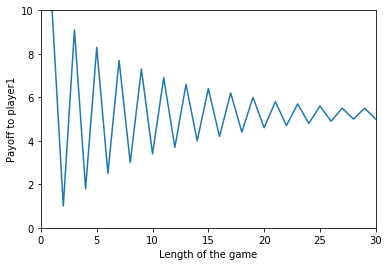

In [45]:
n=30
delta = 0.9
range_n = np.arange(1,n+1,1)

y = []
for i in range_n:
    y.append(outcome(i,delta)[1][1])    
plt.axis([0,30,0,10])
plt.xlabel("Length of the game")
plt.ylabel("Payoff to player1")
plt.plot(range_n,y)

<span style="color:blue">Here matplot is used the generate a figure of the outcomes of player 1, dependent on the lengt of the game. 
In plt.axis the start and stop nummers of the y- and x-axis are given. After that we labeled the axissen.<span style="color:blue">

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

<span style="color:blue"> In the beginning the outcome of player 1 is either very high or either very low. The outcome differs a lot. This creates a zigzagged line. But how bigger n gets, the smaller this difference gets. If one player has a very high outcome, the other one must have a very low outcome. How larger n, how more the outcome of player one tends to be somewhore in the middle (in stead of extreme outcomes), so the outcomes of both players will also be more and more closer. If they'll go one very long they will eventually both have exactly 5. <span style="color:blue">
    